<a href="https://colab.research.google.com/github/Firmanrachmad/PCVK_Firman/blob/main/Modul%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob as glob

Gamma Correction pada citra
--------------------------------
Masukkan nilai gamma: 3


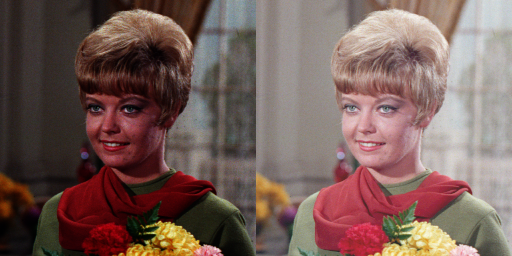

In [ ]:
print('Gamma Correction pada citra')
print('--------------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(255 * np.power(original[y,x,c]/255, 1/gamma), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

Bit Depth pada citra
--------------------------------
Masukkan nilai bit: 4


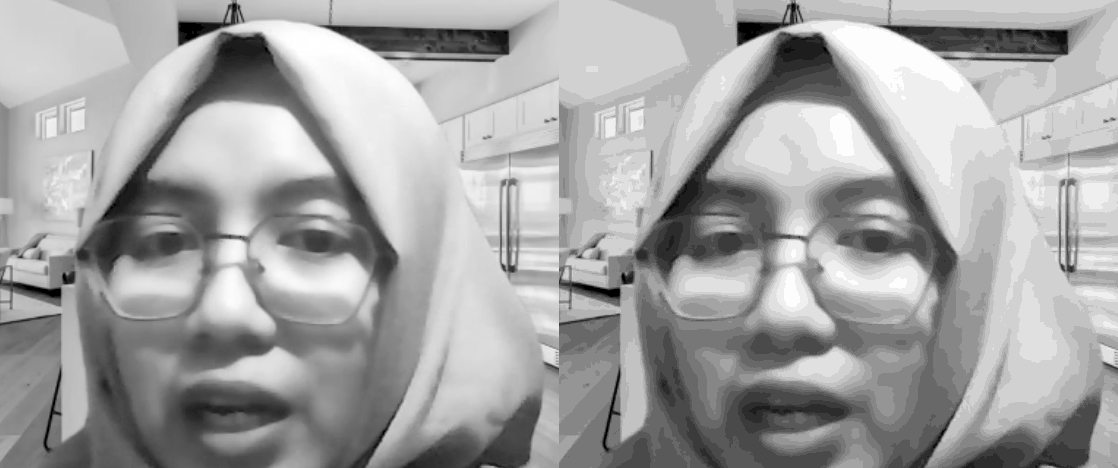

In [ ]:
print('Bit Depth pada citra')
print('--------------------------------')
try:
  bit = int(input('Masukkan nilai bit: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/bu_tari.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

level = 255/np.power(2, bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      depth_image[y,x] = np.clip(round(original[y,x]/level)*level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

In [ ]:
cv_img = [] 
for img in glob.glob('/content/drive/MyDrive/PCVK/Images/noises/*.jpg'): 
  n= cv.imread(img) 
  cv_img.append(n)

In [ ]:
def PSNR(img, amount):
  first_image = cv_img[0]
  for x in range(1, amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------')
try:
  averageCitra = int(input('Masukkan jumlah citra Average: '))
except ValueError:
  print('Error, Not a number')
result = PSNR(cv_img, averageCitra)
print('Nilai PSNR : ')
print(result)  



PSNR
------------------------
Masukkan jumlah citra Average: 5


IndexError: ignored

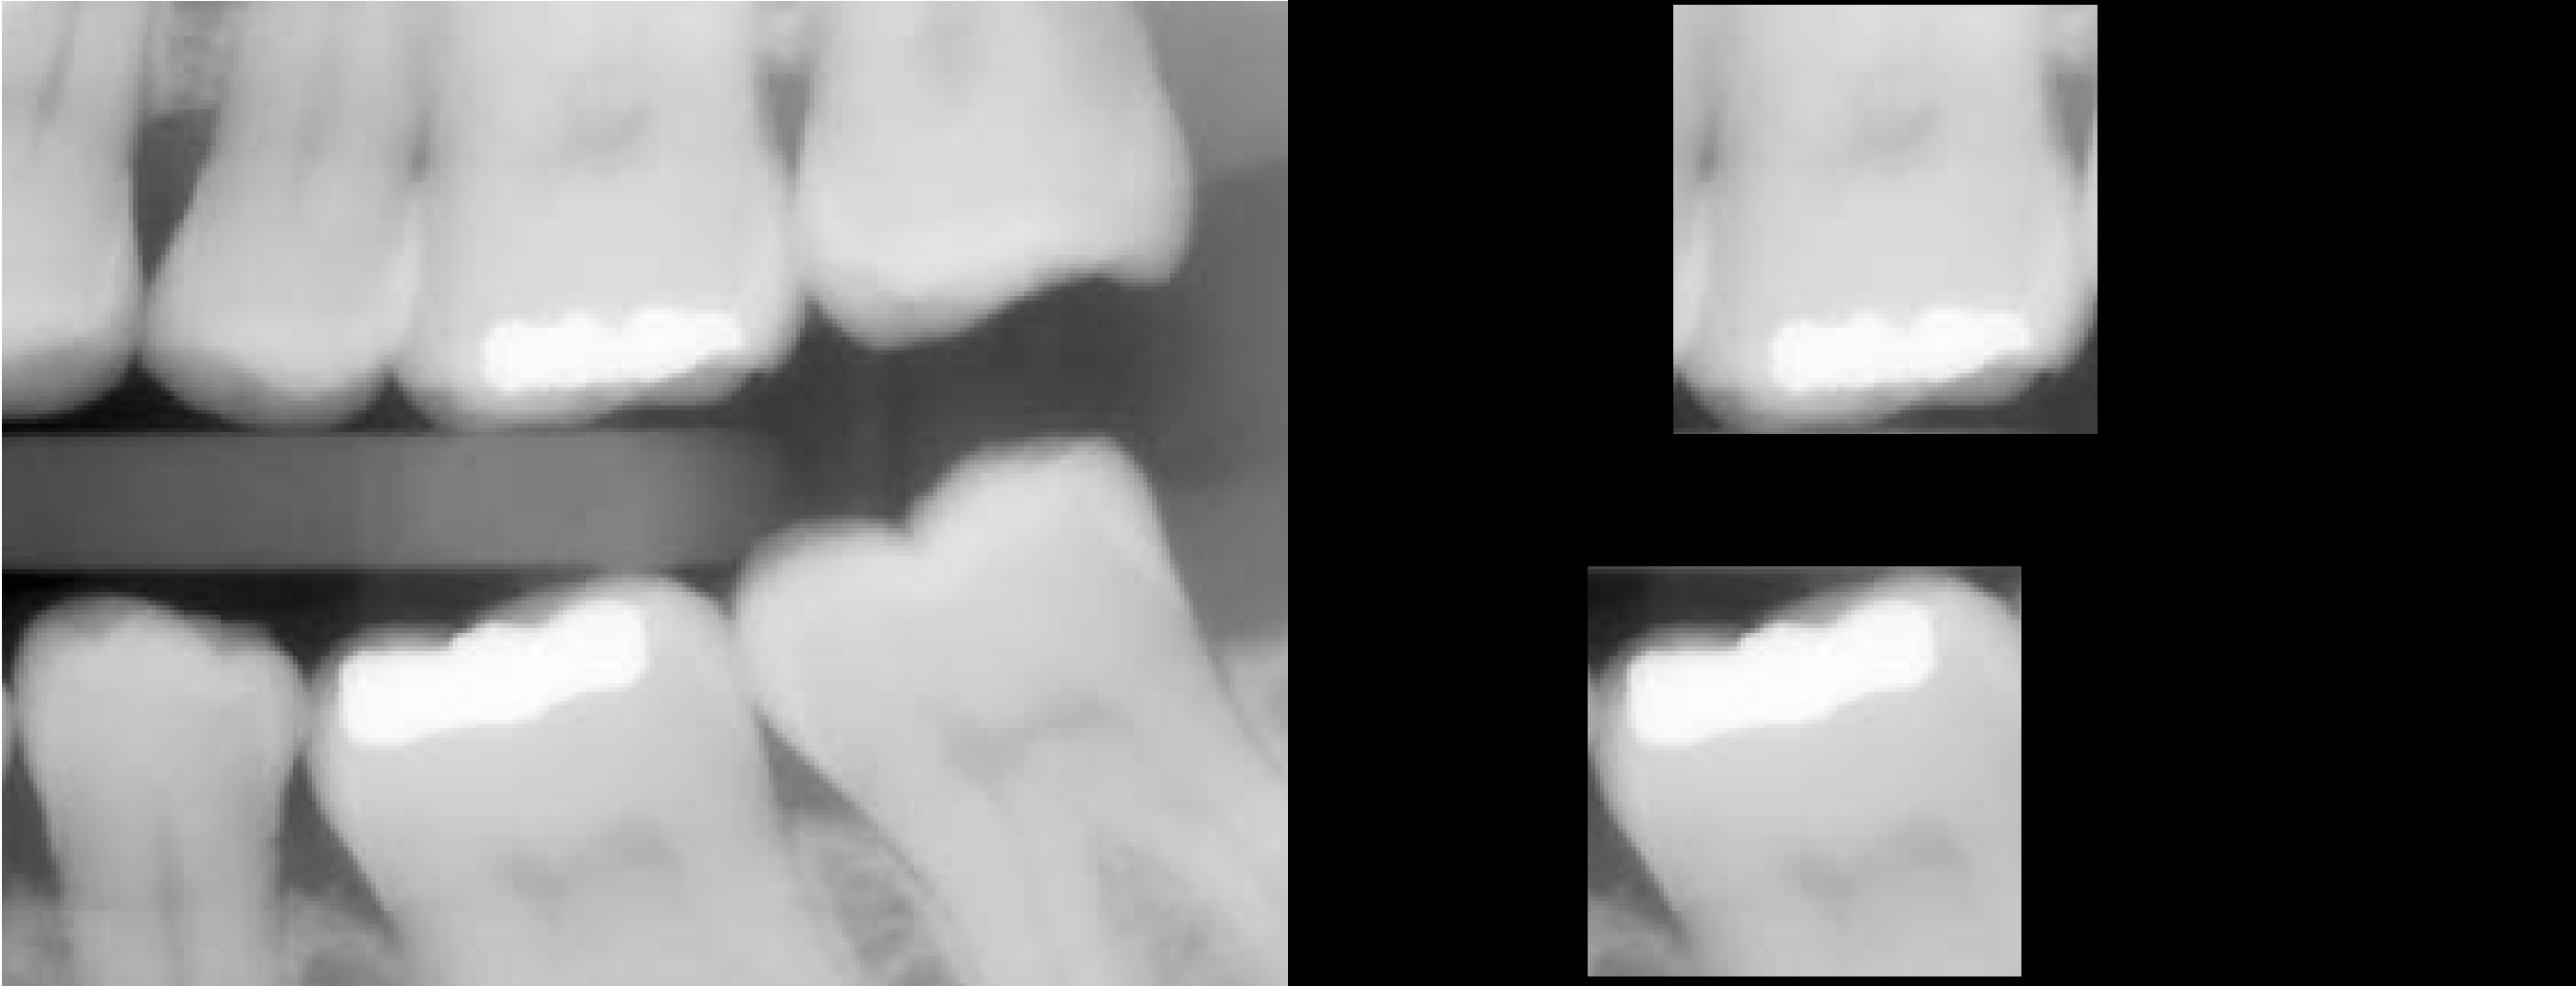

In [3]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(315,595),pt2=(770,1025),color=(255,255,255),thickness=-1)
result = original & mask
mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result = original & mask1
final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

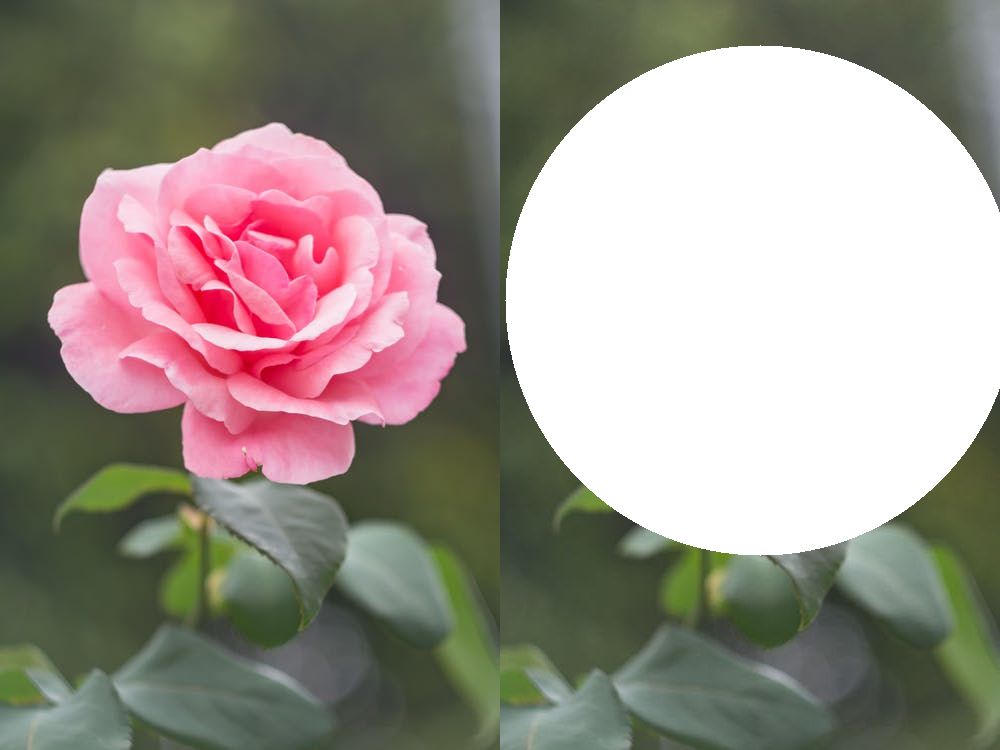

In [4]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/rose_pink.png')
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 255, (255,255,255), -1)
masked = original | mask 
final_frame = cv.hconcat((original, masked))
cv2_imshow(final_frame)

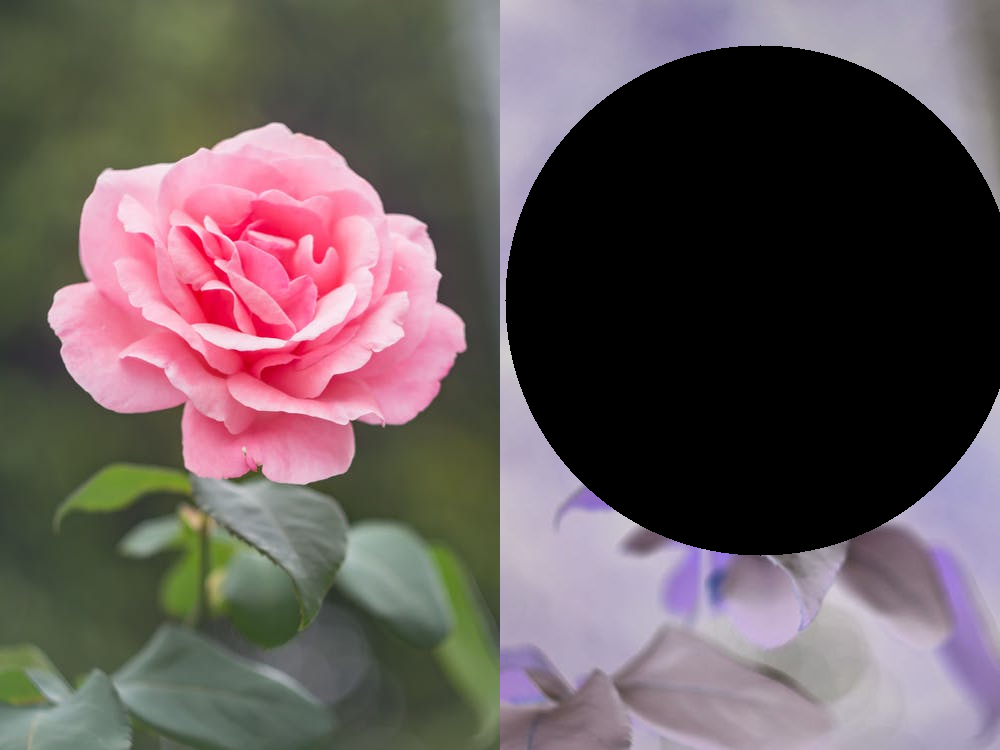

In [5]:

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 255, (255,255,255), -1)
masked = ~original & ~mask 
final_frame = cv.hconcat((original, masked))
cv2_imshow(final_frame)

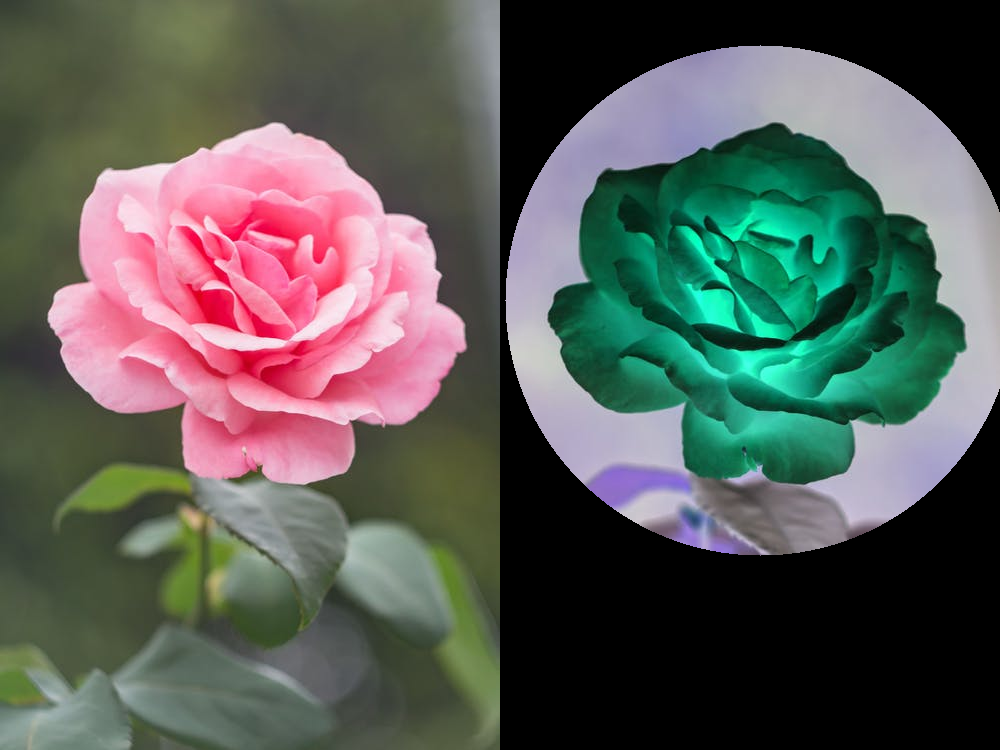

In [6]:
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 255, (255,255,255), -1)
masked = ~original & mask 
final_frame = cv.hconcat((original, masked))
cv2_imshow(final_frame)

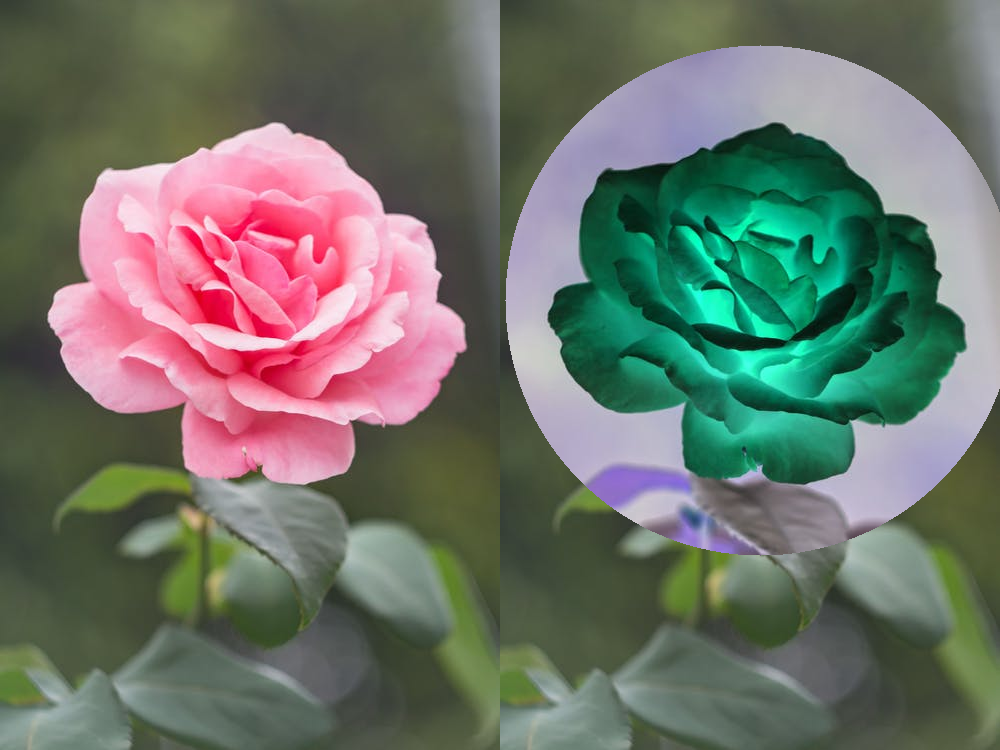

In [7]:
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (260, 300), 255, (255,255,255), -1)
masked = original ^ mask 
final_frame = cv.hconcat((original, masked))
cv2_imshow(final_frame)